# Step by step ML guide - classification
Analog to the and inspired by the fantastic book [`Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition`](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron!
* This jupyter notebook is based on `Chapter 3 – Classification` of the above mentioned book. The original jupyter notebook can be found [`here`](https://github.com/ageron/handson-ml2).

## Scikit-Learn & Python
This notebook is done with **scikit-learn version 0.21.3** and **Python 3.7.5**. See also the [`API Reference`](https://scikit-learn.org/stable/modules/classes.html) of scikit-learn.

## Setup

#### Use operating system dependent functionality
[`os`](https://docs.python.org/3/library/os.html) provides a portable way of using operating system dependent functionality

In [60]:
import os

[`numpy`](http://www.numpy.org/) is the fundamental package for scientific computing with Python.
<br>
[`pandas`](https://pandas.pydata.org/pandas-docs/stable/#module-pandas) providing high-performance, easy-to-use data structures and data analysis tools.

In [61]:
import numpy as np
import pandas as pd

#### Ploting figures
[`matplotlib`](https://matplotlib.org/) for plotting functions - use `%matplotlib inline` to plot the figures inline (inside the notebook)

In [62]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Set the number of CPUs to be used by to the parameter `n_jobs`.

In [63]:
# set tne numbers of processors to be used
# value 1 -> use 1 CPU
# value 2 -> use 2 CPUs ...
# value -1 -> use all CPUs
# value -2 -> use all but one CPU ...
n_cpus = -2

### Get the MNIST data set
Fetch the MNIST dataset by using [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html). 

In [64]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Display the downloaded `MNIST` dataset. Use the serult of `mnist.keys` to focus on the different parts. 

In [65]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [66]:
X, y = mnist['data'], mnist['target']

In [67]:
X.shape

(70000, 784)

In [68]:
y.shape

(70000,)

Plotting function for the images / figures

In [69]:
def plot_digit(data):
    data_reshaped = data.reshape(28,28)
    
    plt.imshow(data_reshaped, cmap='binary')
    #plt.imshow(data_reshapedS)
    plt.axis('off')
    plt.show()

Plot the first digit:

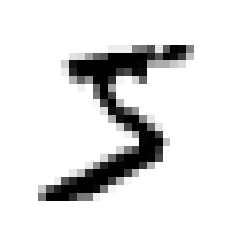

In [70]:
some_digit = X[0]
plot_digit(some_digit)

Plot the label of the first image:

In [71]:
y[0]

'5'

In [72]:
type(y[0])

str

Convert the labels from type `string` into type `int`.

In [73]:
y = y.astype(np.uint8)
y[0]

5

In [74]:
type(y[0])

numpy.uint8

### Split the data into a training and a test set
The MNIST dataset has been already split (and shuffled before split) into a training set (the first 60.000 entries) and a test set (the last 10.000 entries) 

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
X_train.shape

(60000, 784)

## Binary classifier
A binary classifier distinguishes between two classes. In this example between the values 5 and not-5.<br>
Create a target vector for this classification task ( 5 and not-5).

In [77]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5) # True for all 5s, False for all other digits
y_train_5, y_train # print both arrays

(array([ True, False, False, ...,  True, False, False]),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

Use the [`Stochastic Gradient Decent (SGD)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) classifier.

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, n_jobs=n_cpus)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-2, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
sgd_clf.predict([some_digit])

array([ True])

### Performance measurement
Do a first performance measurement with [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). `cross_val_score` evaluates a score for each cross validation step. In the example below, there will be 3 scores for the 3 cross validation steps (cv=3).

In [80]:
from sklearn.model_selection import cross_val_score
import time

start = time.time()
cvs_res = cross_val_score(sgd_clf, X_train, y_train_5, n_jobs=n_cpus,
                cv=3, scoring='accuracy')
stop = time.time()
print('Time for cross-val-score with n_jobs={} is : {:.03} sec'.format(n_cpus, stop-start))
print(cvs_res)

Time for cross-val-score with n_jobs=-2 is : 9.08 sec
[0.95035 0.96035 0.9604 ]


### Confusion Matrix
Do the performance measurement with[`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) and [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).<br>
In contrast to `cross_val_score`, `cross_val_predict` does not return a score but an estimate for each input data point. In the example below, this will be an array with 60.000 elements. 

In [81]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, 
                               n_jobs=n_cpus, cv=3)
print(y_train_pred)

[ True False False ...  True False False]


Create the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).<br>
By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.
<br>
Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.
* Therefore **each row** represents an **actual class**!
* And **each column** represents an **predicted class**!

In [82]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train_5, y_train_pred)

print(conf_matrix)

[[53892   687]
 [ 1891  3530]]


**Conclusion:**
* The value 53892 are the `true negatives (TN)`. These are the values that are correctly classified as not-5.
* The value 3530 are the `true positives (TP)`. These are the values that are correctly classified as 5.
* The value 1891 are the `false negatives (FN)`. These are the values that are falsely classified as not-5 although the true value is 5.
* The value 687 are the `false positives (FP)`. These are the values that are falsely classified as 5 although the true value is not-5.

A perfect classifier would generate the following confusion_matrix: there are just true positive and true negative values!

In [83]:
conf_matrix = confusion_matrix(y_train_5, y_train_5)
print(conf_matrix)

[[54579     0]
 [    0  5421]]


### Precision
Accuracy of the positive predictions. How many of the positive predictions are real positives!
<br><br>
$$ precision = \frac {TP}{TP + FP} $$

### Recall
Ratio of the positive instances that are correctly detected by the classifier. How many of the real positive instances have been classified as positive:
<br><br>
$$ recall = \frac {TP}{TP + FN} $$

Use [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) and [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) to calculate the precision and the recall.

In [84]:
from sklearn.metrics import precision_score, recall_score

prec_score = precision_score(y_train_5, y_train_pred)
rec_score = recall_score(y_train_5, y_train_pred)
print('The precision is {:.03}% and the recall is {:.03}%'.format(prec_score*100, rec_score*100))

The precision is 83.7% and the recall is 65.1%


### $F_1$ Score
The $F_1$ score is the *harmonic mean* of precision and recall. 
<br>
The formula is: $\ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} =             
\text {2} \enspace \textbf{x} \enspace \dfrac{\text{precision} \enspace \textbf{x} \enspace \text{recall}}{\text{precision} \enspace \textbf{+} \enspace \text{recall}} $ 
<br>
The *harmonic mean* gives much more weight to low values. Therefore the classifier will only get a high $F_1$ score if both recall and precision are high.
<br><br>
Use [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) to calculate the $F_1$ score.

In [85]:
from sklearn.metrics import f1_score

f_one_score = f1_score(y_train_5, y_train_pred)
print('F1 score: {}'.format(f_one_score))

F1 score: 0.7325171197343846


## Precision / Recall Trade-off

Get the decision scores of the SGDClassifier.

In [86]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

Set the threshold to `0`. This is the default value for the SGDClassifier.

In [87]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Set the threshold to 8000.

In [89]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Calling `cross_val_predict` with the parameter *method="decision_function"* will return the decision scores for each input item.

In [94]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=n_cpus,
                             method="decision_function")

y_estimate = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=n_cpus)

print(y_scores)
print(y_estimate)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]
[ True False False ...  True False False]


[`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) computes the precision-recall pairs for different thresholds.
<br>
*Note: this implementation is restricted to the binary classification task.*

In [96]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [97]:
recalls.shape, precisions.shape, thresholds.shape

((59967,), (59967,), (59966,))

In [98]:
recalls[0], precisions[0], thresholds[0]

(1.0, 0.0904012273621719, -106527.45300471177)

In [110]:
print(recalls[int(recalls.shape[0])-1], precisions[int(precisions.shape[0])-1], 
      thresholds[int(thresholds.shape[0])-1])

0.0 1.0 49441.43765904775


**Conclusion:** Recall and Precision are between `0` and `1` and depend on the value of the threshold.

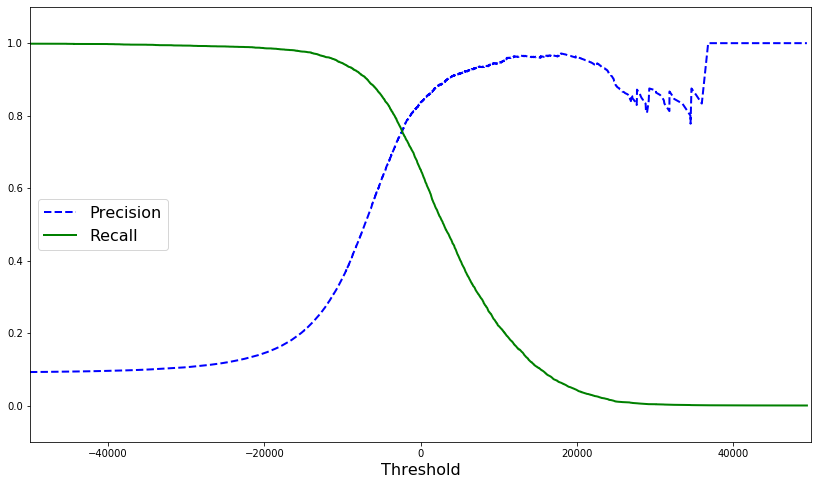

In [125]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="center left", fontsize=16)
    plt.ylim([-0.1, 1.1])

plt.figure(figsize=(14, 8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-50000, 50000])
plt.show()